In [1]:
import time
import random
import matplotlib.pyplot as plt
import tracemalloc

In [2]:
def knapsack(weights, values, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

In [3]:
weights = [2, 3, 4, 5]   # costs
values  = [3, 4, 5, 8]   # profits
capacity = 5   #capacity

In [4]:
max_profit = knapsack(weights, values, capacity)
print("Weights:", weights)
print("Values:", values)
print("Budget:", capacity)
print("Maximum Profit:", max_profit)

Weights: [2, 3, 4, 5]
Values: [3, 4, 5, 8]
Budget: 5
Maximum Profit: 8


In [5]:
sizes = [5, 10, 15, 20, 25, 30]  # number of items
times = []
spaces = []
profits = []

In [6]:
for n in sizes:
    weights = [random.randint(1, 15) for _ in range(n)]
    values = [random.randint(10, 100) for _ in range(n)]
    capacity = n * 5  # budget increases with items

    # Time measurement
    start = time.time()
    profit = knapsack(weights, values, capacity)
    end = time.time()
    times.append(end - start)
    profits.append(profit)

    # Memory measurement
    tracemalloc.start()
    knapsack(weights, values, capacity)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    spaces.append(peak / 1024)

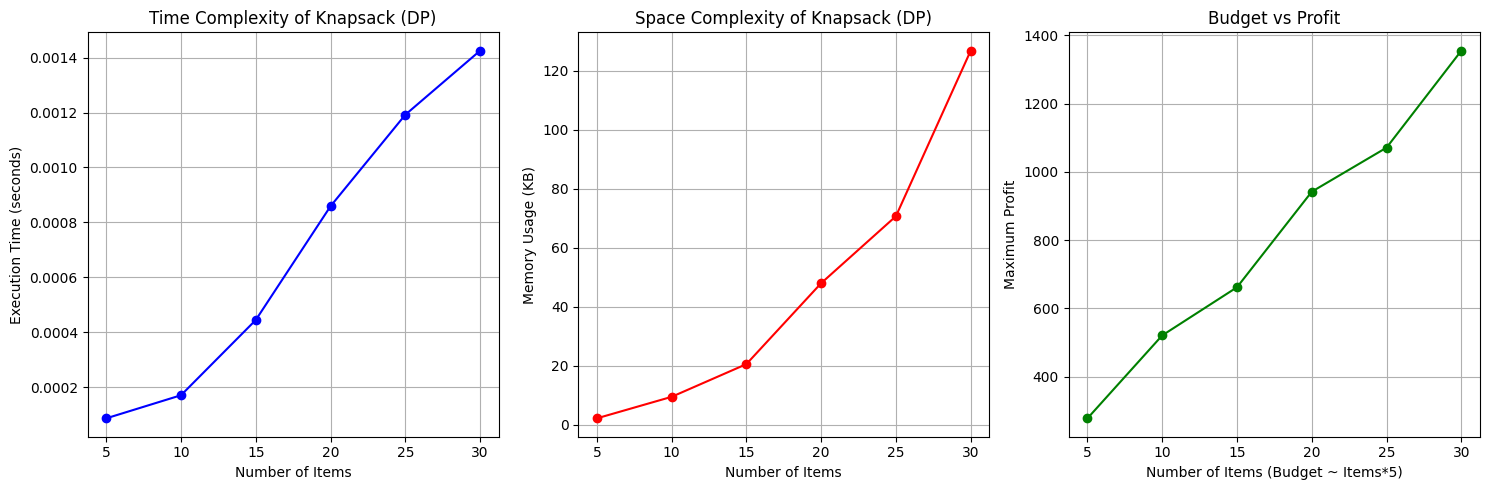

In [7]:
plt.figure(figsize=(15,5))

# Time Complexity Graph
plt.subplot(1,3,1)
plt.plot(sizes, times, marker='o', color='blue')
plt.title("Time Complexity of Knapsack (DP)")
plt.xlabel("Number of Items")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)

# Space Complexity Graph
plt.subplot(1,3,2)
plt.plot(sizes, spaces, marker='o', color='red')
plt.title("Space Complexity of Knapsack (DP)")
plt.xlabel("Number of Items")
plt.ylabel("Memory Usage (KB)")
plt.grid(True)

# Budget vs Profit Graph
plt.subplot(1,3,3)
plt.plot(sizes, profits, marker='o', color='green')
plt.title("Budget vs Profit")
plt.xlabel("Number of Items (Budget ~ Items*5)")
plt.ylabel("Maximum Profit")
plt.grid(True)

plt.tight_layout()
plt.show()